<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_15_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODE 15.2 FITTING DOSE RESPONSE DATA USING 

Optical absorption (OA) and electron spin resonance (ESR)  signals are
often measured simultaneously with TL and/or OSL with the same sample.
These combined types of experiments produce important information
about the underlying luminescence mechanisms, as well as about the
nature of the trapping and luminescence centers.

The dose response of TL, OSL, OA and ESR signals exhibit nonlinear
regions, associated with the phenomena of superlinearity and sublinearity. 

A good example of simultaneous measurements and possible correlations
between the TL, ESR and OA signals
has been found in a sample of fused silica (Wieser et al. 1991).
This type of multifaceted experiment can be very useful in identifying
the source of the various luminescence signals, i.e. the nature of
the traps and centers in the dosimetric material.

The most commonly used function
for fitting the dose response of luminescence signal is the saturating
exponential function (SE). Additional general dose response equations
are the saturating exponential plus linear function (SEL)\index{single saturating exponential plus linear SEL},
the double saturating exponential (DSE)\index{double saturating exponential DSE}
and the GOK-dose response (GOK-DR) equations. These equations are:

\begin{equation}
\frac{n(D)}{N}=1-\exp\left[-\frac{\,D}{D_{0}}\right]\:\qquad\textrm{SE}\
\end{equation}

\begin{equation}
\frac{n(D)}{N}=B_{1}\:D+B_{2}\left(1-\exp\left[-\frac{\,D}{D_{0}}\right]\right)\:\qquad\textrm{SEL}\
\end{equation}

\begin{equation}
\frac{n(D)}{N}=B_{3}\left(1-\exp\left[-\frac{\,D}{D_{02}}\right]\right)+B_{4}\left(1-\exp\left[-\frac{\,D}{D_{01}}\right]\right)\:\quad\textrm{DSE}\
\end{equation}

\begin{equation}
\frac{n(D)}{N}=\left[1-\left(1+B\:b\:D\right)^{-1/b}\right]\qquad\textrm{GOK-DR}\
\end{equation}


\begin{equation}
\frac{n(D)}{A}=1+\frac{1}{1-R}W\biggl[(R-1)\exp\biggl(R-1-D/D_{c}\biggr)\biggr]\:\
\end{equation}

The last equation is the PKC-equation (Pagonis-Kitis-Chen), which has been shown to fit experimental dose response from many types of materials. $R$ is the retrapping ratio ($0<R<1$), $D_c$ is the characteristic dose and $A$ is a proportionality constant, and $W[z]$ is the Lambert function.

In the above equations, $D$ is the irradiation dose, and $D_{0}$ is called the characteristic
dose of the trap filling process. $B_{i}$ $(i=1\ldots4)$ are constants,
and $D_{01},\:D_{02}$ are two constants characteristic of the sample
with the dimensions of dose $D$. As a rule of thumb when using the
SE function to fit data, the dose response is usually fully saturated
after a dose of about $5D_{0}$. In the case of the GOK-DR model,
$b$ is the GOK parameter and $A$, $B$ are constants.

% Preview source code from paragraph 33 to 35

In Code 15.2  we fit dose response data using three different equations:
the PKC equation, the SE equation, and
the double saturating exponential (DSE) equation.

Code 15.2 below shows the analysis of SAR-OSL experimental dose response curves from Timar-Gabor et al. {Timar-Gabor_2012} (their Figure 3), for
coarse grain quartz samples in a loess-palaeosol sequence.

The solid lines
 are the least squares fits using the PKC Equation above, showing that the PKC equation can be used to describe dose responses, even at the high doses involved
in this experiment. 

The best fit parameters are listed in the Table at the end of the Code.


+-----+-----+------+-----+------+-----+------+-------+-----+
|     |  A1 | dA1  | Do1 | dDo1 |  A2 | dA2  |   D2  | dD2 |
+-----+-----+------+-----+------+-----+------+-------+-----+
| DSE | 1.8 | 0.34 | 5.5 |  2   | 4.8 | 0.34 | 240.3 |  39 |
+-----+-----+------+-----+------+-----+------+-------+-----+
+----+-----+-----+---------+------+
|    |  N  |  dN | Do (Gy) | dDc  |
+----+-----+-----+---------+------+
| SE | 6.5 | 0.2 |  123.4  | 26.5 |
+----+-----+-----+---------+------+
+-----+-----+--------+------------+------------+---------+--------------------+
|     |  N  |   dN   |     R      |     dR     | Dc (Gy) |        dDc         |
+-----+-----+--------+------------+------------+---------+--------------------+
| PKC | 2.0 | 2784.0 |    5.0E-01 |    1.1E+03 |   328   | 17038.506699388152 |
+-----+-----+--------+------------+------------+---------+--------------------+


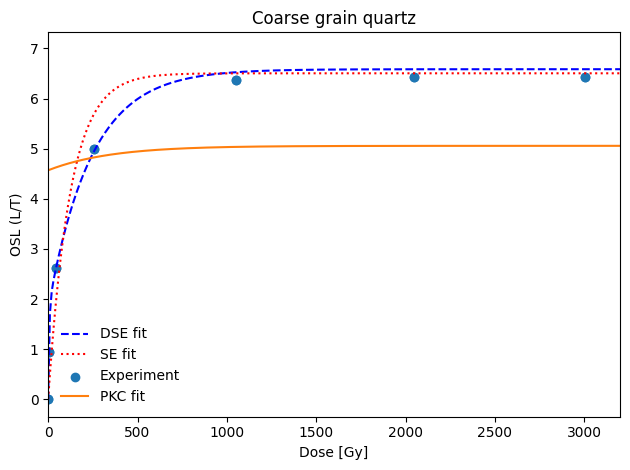

In [10]:
#Fit dose response data with Saturating Exponential
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wrightomega
import warnings
warnings.filterwarnings("ignore")
from scipy import optimize
from prettytable import PrettyTable 

## fit to SE equation  ----
x_data= ([0, 3.55, 44.18, 258.718, 1051.62, 2044.98, 3003.94,
      5024.61, 7046.32, 9992.29])
y_data = ([0, 0.93512, 2.61108, 4.99104, 6.36704, 6.42148, 
      6.43643, 6.46792, 6.77215, 6.97391])

# plot the data
plt.plot(x_data,y_data,"o");

# saturating exponential function (SE)
def SE(x_data,A,Do):
    u=abs(A)*(1-np.exp(-x_data/np.abs(Do)))
    return u

# PKC equation
def lambertfit(x_data,N,R,Dc):
    u=np.real(N*(1+wrightomega((np.abs(R)-1)*np.exp(np.abs(R)-1-\
    x_data/np.abs(Dc)))/(1-np.abs(R))))
    u.astype(float)
    return u

# double saturating exponential (DSE)
def DSE(x_data,A,Do1,B,Do2):
    u=A*(1-np.exp(-x_data/np.abs(Do1)))+B*(1-\
    np.exp(-x_data/np.abs(Do2)))
    return u

# initial values for DSE
init_vals=[1,1000,1,10000]                #DSE
params, cov = optimize.curve_fit(DSE,\
x_data, y_data,p0=init_vals)

# best fit parameters for DSE
[A,Do]=[round(params[x],1) for x in range(2)]
dA = round(np.sqrt(cov[0][0]),2)
dDo = int(np.sqrt(cov[1][1]))

# plot data and DSE fit
x_vals=np.arange(0,1e4,1e1)
plt.plot(x_vals, DSE(x_vals, *params[0:4]),c="b",\
linestyle="dashed",label='DSE fit'); 
plt.xlim(0,3200);

# create and print table of best fi parameters
[A1,Do1,A2,Do2]=[abs(round(params[x],1)) for x in range(4)]
dA1 = round(np.sqrt(cov[0][0]),2)
dDo1 = int(np.sqrt(cov[1][1]))
dA2 = round(np.sqrt(cov[2][2]),2)
dDo2 = int(np.sqrt(cov[3][3]))
myTable = PrettyTable([" ","A1", "dA1", "Do1","dDo1","A2",\
"dA2","D2","dD2"]) 
myTable.add_row(["DSE",A1,dA1,Do1,\
dDo1,A2,dA2,Do2,dDo2])
print(myTable)

# initial values for SE
init_vals=[20,20]                        #SE
params, cov = optimize.curve_fit(SE,\
x_data, y_data,p0=init_vals)
[A,Do]=[round(params[x],1) for x in range(2)]
dA = round(np.sqrt(cov[0][0]),2)
dDo = int(np.sqrt(cov[1][1]))
plt.plot(x_vals, SE(x_vals, *params[0:2]),c="r",\
linestyle="dotted",label='SE fit');     
plt.scatter(x_data, y_data, label='Experiment');
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('OSL (L/T)');
plt.xlabel('Dose [Gy]');
plt.title('Coarse grain quartz');
# find errors for SE fit
dA = round(np.sqrt(cov[0][0]),1)
dDo = round(np.sqrt(cov[1][1]),1)

# initial values for PKC
init_vals=[100.0,.1,100]

# find best fit with PKC
params, cov = optimize.curve_fit(lambertfit,\
x_data, y_data,p0=init_vals)

# plot best fit with PKC 
dN = round(np.sqrt(cov[0][0]),0)
dR = format(abs(np.sqrt(cov[1][1])),"10.1E")
dDc = np.sqrt(cov[2][2])
plt.plot(x_vals, lambertfit(x_vals, *params[0:4]),\
label='PKC fit');     
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()

# create and print table of parameters for SE
myTable2 = PrettyTable([" ","N", "dN", "Do (Gy)","dDc"]) 
myTable2.add_row(["SE",A,dA,Do,\
dDo])
print(myTable2)

# create and print table of parameters for PKC
myTable3=PrettyTable([" ","N","dN", "R","dR","Dc (Gy)","dDc"]) 
myTable3.add_row(["PKC",round(params[0],0),dN,\
format(abs(params[1]),"10.1E"),dR,abs(int(params[2])),dDc])
print(myTable3)
plt.show()

# [Return to EURADOS website](https://blog.mcdaniel.edu/vasilispagonis/python-codes-for-eurados-2023/)